## Google Colab

In [ ]:
# !git clone https://github.com/taslimamindia/NERC.git

In [ ]:
# from nltk import download
# download('wordnet')
# download('stopwords')
# download('conll2000')

## Import

In [8]:
%load_ext autoreload
%autoreload all
from nerc.data import Data
from nerc.loading import Loading
from nerc.word2vec import Model_Word2Vec
from nerc.cnn import Model_CNN
from nerc.functions import checkDataset, save_model, plot_network
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
if os.path.exists("/content/NERC/Data/conll2003_english/"): 
    path = "/content/NERC/Data/conll2003_english/"
    epochs = 50
else: 
    path = "E:/PFE/CoNLL2003/NERC/Data/conll2003_english/"
    epochs = 2
data = Data(VOCAB_SIZE=300, PADDING_SIZE=10, EPOCHS=epochs)
Loading(data, path, names=["train.txt", "test.txt", "valid.txt"])
train, test, valid = Data(), Data(), Data()
data.unicity()

#### Parametrage

In [10]:
w2v = Model_Word2Vec(data.sentences, data.VOCAB_SIZE)

## CNN


In [11]:
model = Model_CNN(data, w2v, train=train, test=test, valid=valid)
model.preprocessing()
model.vectorization()

### Model without validSet

In [ ]:
model.train_test_split()
checkDataset(train=model.train, test=model.test)

#### Architecture Word2Vec

#### Training

In [12]:
model.architecture_word2vec()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 300)]         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 64)            57664     
                                                                 
 dropout_2 (Dropout)         (None, 10, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 10, 32)            6176      
                                                                 
 dropout_3 (Dropout)         (None, 10, 32)            0         
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               4108

In [15]:
plot_network(model, "word2vec_cnn")

In [ ]:
model.training(model.train.x, model.train.y)

In [ ]:
model.testing(model.test.x, model.test.y)

In [ ]:
model.predicting(model.test.x, model.test.y)

#### Save model

In [ ]:
cmodel = Model_CNN(None, None)
save_model(cmodel=cmodel, model=model, status=1, dir="Model/CNN", name="model_withoutValidSet_word2vec")

#### Architecture Word2Vec and Features

#### Training

In [16]:
model.architecture_word2vec_features()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 300)]    0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 10, 64)       57664       ['input_1[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 10, 64)       0           ['conv1d_4[0][0]']               
                                                                                                  
 conv1d_5 (Conv1D)              (None, 10, 32)       6176        ['dropout_4[0][0]']              
                                                                                            

In [18]:
plot_network(model, "word2vec_cnn_features")

In [ ]:
model.training([model.train.x, model.train.features], model.train.y)

In [ ]:
model.testing([model.test.x, model.test.features], model.test.y)

In [ ]:
model.predicting([model.test.x, model.test.features], model.test.y)

#### Save model

In [ ]:
cmodel = Model_CNN(None, None)
save_model(cmodel=cmodel, model=model, status=2, dir="Model/CNN", name="model_withoutValidSet_word2vec_features")

### Model with validSet

In [ ]:
model.train_test_valid_split()
checkDataset(train=model.train, test=model.test, valid=model.valid)

#### Architecture Word2Vec

#### Training

In [5]:
model.architecture_word2vec()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 300)]         0         
                                                                 
 conv1d (Conv1D)             (None, 10, 64)            57664     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 32)            6176      
                                                                 
 dropout_1 (Dropout)         (None, 10, 32)            0         
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 128)               41088 

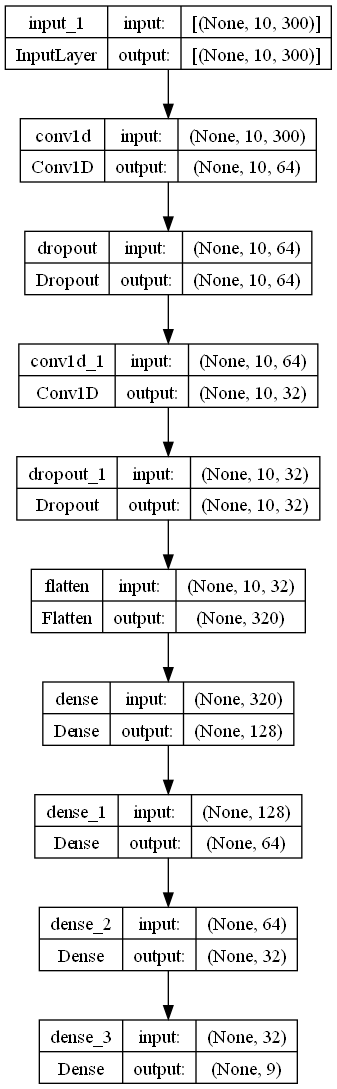

In [ ]:
model.training_valid(model.train.x, model.train.y, model.valid.x, model.valid.y)

In [ ]:
model.testing(model.test.x, model.test.y)

In [ ]:
model.predicting(model.test.x, model.test.y)

#### Save model

In [ ]:
cmodel = Model_CNN(None, None)
save_model(cmodel=cmodel, model=model, status=1, dir="Model/CNN", name="model_withValidSet_word2vec")

#### Architecture Word2Vec and Features

#### Training

In [ ]:
model.architecture_word2vec_features()
model.summary()

In [ ]:
model.training_valid([model.train.x, model.train.features], model.train.y, [model.valid.x, model.valid.features], model.valid.y)

In [ ]:
model.testing([model.test.x, model.test.features], model.test.y)

In [ ]:
model.predicting([model.test.x, model.test.features], model.test.y)

#### Save model

In [ ]:
cmodel = Model_CNN(None, None)
save_model(cmodel=cmodel, model=model, status=2, dir="Model/CNN", name="model_withValidSet_word2vec_features")